### About Dataset

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

+ The period from June 2012 to September 2012.
+ The dataset includes 14 attributes and 1 output attribute (class).
+ The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

##### Features in the dataset
1. day - Day
2. month - Month
3. year - Year which is 2012
4. Temperature - temperature noon (temperature max) in Celsius degrees: 22 to 42
5. RH - Relative Humidity in %: 21 to 90
6. Ws - Wind speed in km/h: 6 to 29
7. Rain - total day in mm: 0 to 16.8
8. FFMC - Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
9. DMC - Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
10. DC - Drought Code (DC) index from the FWI system: 7 to 220.4
11. ISI - Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
12. BUI - Buildup Index (BUI) index from the FWI system: 1.1 to 68
13. FWI - Fire Weather Index (FWI) Index: 0 to 31.1
14. Classes - Classes: two classes, namely fire and not fire.
15. Region - region: 2 region represented in the form of 0 and 1


In [37]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [38]:
# load the data
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### data cleaning

In [39]:
# checking the distribution of the data in each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


+ column year has a single value '2012'. It is a data metrics record of Algerian Forest Fire taken for 4 months in 2012. So the column 'year' has no use for the data insights and model building. 

In [49]:
# drop the columns that are not needed
df = df.drop('year', axis=1)

In [50]:
# checking the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    int64  
 13  Region       243 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 26.7 KB


+ There is no null value in the dataset and all the columns are numerical data type except classes.

In [51]:
df['Classes'].value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

+ there is 2 class label in classes: 'fire' and 'not fire'. But here due to whitespaces there is more than 2. 

In [42]:
# checking for unique values in the 'Classes' column
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [43]:
df['Classes'] = df['Classes'].replace(['fire   ', 'fire ', 'not fire   ', 'not fire ', 'not fire     ', 'not fire    '], ['fire', 'fire', 'not fire', 'not fire', 'not fire', 'not fire'])

In [44]:
# checking for unique values in the 'Classes' column
df['Classes'].value_counts(0)

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [45]:
# Replacing the categorical values into numeric for class 'Classes' using LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Classes' column
df['Classes'] = label_encoder.fit_transform(df['Classes'])

# Print the updated DataFrame
df['Classes'].unique()

array([1, 0])

In [46]:
# splitting the data into features and target variable

def split_features_target(data, target_name):
    """Split the data into features and target variable"""
    
    # Extract the target variable
    target = data[target_name]
    
    # Drop the target variable from the feature data
    features = data.drop(target_name, axis=1)
    
    return features, target

X, y = split_features_target(df, 'FWI')

### data visualization

Creating visualizations to explore relationships between the features and the target variable (Fire Weather Index - FWI).

In [47]:
# Set style for plots
sns.set(style="whitegrid")

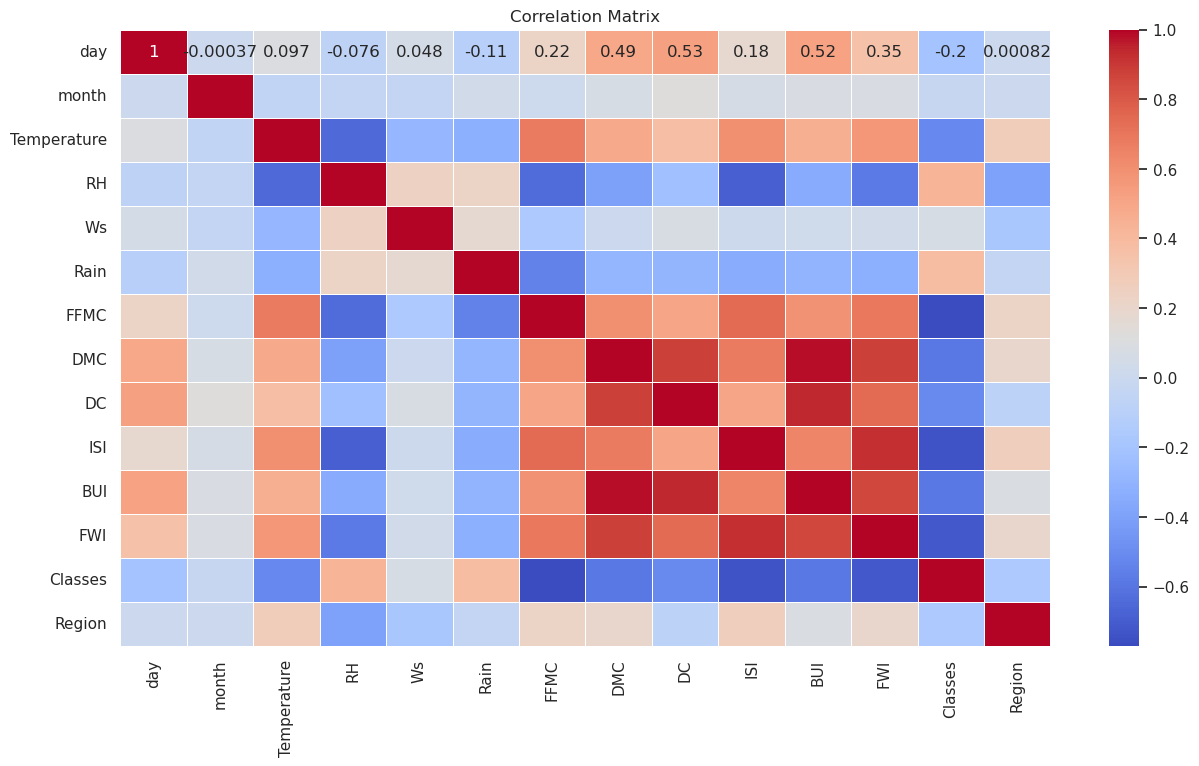

In [58]:
# Correlation matrix to understand relationships between variables 
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

+ There is a strong positive correlation between features like DMC and BUI,FWI AND ISI, DC and DMC, 
+ There is a strong negative correlation between features like  Temperature and RH, Classes and FFMC, Classes and ISI, Classes and FWI.
+ Since FWI is the target variable, so feature in correlation with target variable is ignored and with other features we can perform feature engineering and only take relevant features to build the model.


### feature engineering

### model building and evaluation

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 14), (49, 14), (194,), (49,))

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'not fire   '